In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\datasets_571_1094_anime.csv")

In [7]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
Taka no Tsume 8: Yoshida-kun no X-Files    10.00
Spoon-hime no Swing Kitchen                 9.60
Mogura no Motoro                            9.50
Kimi no Na wa.                              9.37
Kahei no Umi                                9.33
Name: rating, dtype: float64

In [9]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Saru Kani Gassen           2
Shi Wan Ge Leng Xiaohua    2
◯                          1
Hiroshima e no Tabi        1
Hit wo Nerae! Specials     1
Name: rating, dtype: int64

In [10]:
ratings=pd.DataFrame(df.groupby('name')['rating'].mean())

In [11]:
ratings['num of ratings']=pd.DataFrame(df.groupby('name')['rating'].count())
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,5.06,1
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00,1
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06,1
&quot;Bungaku Shoujo&quot; Memoire,7.54,1
&quot;Bungaku Shoujo&quot; Movie,7.63,1


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

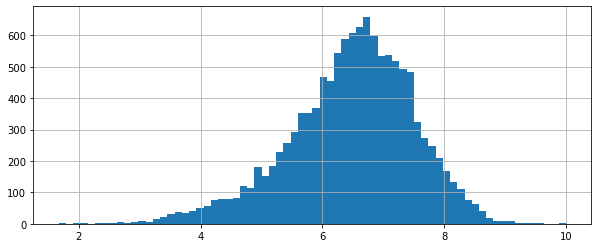

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [18]:
moviemat=df.pivot_table(index='anime_id',columns='name',values='rating')
moviemat.head(10)

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
name,,
Shi Wan Ge Leng Xiaohua,6.87,2
Saru Kani Gassen,4.99,2
Osomatsu-kun: Iyami wa Hitori Kaze no Naka,6.40,1
Oshiri Kajiri Mushi (TV) 3rd Season,5.48,1
Oshiri Kajiri Mushi (TV) 4th Season,5.58,1
Oshiruko,5.16,1
Oshizuka ni,4.08,1
Osiris no Tenbin,6.06,1
Osiris no Tenbin: Season 2,6.08,1


In [21]:
shiwan_user_ratings=moviemat['Shi Wan Ge Leng Xiaohua']
shiwan_user_ratings.head(10)

anime_id
1    NaN
5    NaN
6    NaN
7    NaN
8    NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Shi Wan Ge Leng Xiaohua, dtype: float64

In [23]:
similar_to_shiwan=moviemat.corrwith(shiwan_user_ratings)

In [ ]:
corr_shiwan=pd.DataFrame('similar_to_shiwan',columns=['Correlation'])
corr_shiwan.dropna(inplace=True)
corr_shiwan=corr_shiwan.join(ratings['num of ratings'])
corr_shiwan[corr_shiwan['num of ratings']>100].sort_values('Correlation',ascending=False)